In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math

In [2]:
dev_set = pd.read_csv("../data/assignment1_dev_set.csv")
val_set = pd.read_csv("../data/assignment1_val_set.csv")

In [3]:
dev_set.drop(columns=['Unnamed: 0', 'Project ID', 'Experiment type', 'Sex', 'Host age', 'BMI'])  # Assuming BMI is the target column

,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,D006262,0.000000,0.000000,0.000000,0.000000,0.017674,0.000000,0.000000,0.00000,0.117827,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,D006262,0.001028,0.000000,0.000000,0.000000,13.015800,0.001542,0.000000,0.00000,0.073486,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,D006262,0.001406,0.000000,0.000000,0.001406,0.002812,0.201074,0.000000,0.00000,0.043590,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,D006262,0.000000,0.008825,0.273562,0.000000,0.044123,0.004412,0.348570,0.00000,0.026474,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,D006262,0.002878,0.037419,7.359970,0.000000,0.872143,0.000000,0.000000,0.00000,1.732770,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,D006262,0.000000,0.000000,0.000000,0.000000,0.509040,0.015800,0.018390,0.06278,0.059660,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002160,0.000000,0.000000
485,D006262,0.000000,0.000000,0.000000,0.000000,0.005112,0.015139,0.000000,0.00000,0.020054,...,0.000000,0.017105,0.001770,0.032834,0.000000,0.000590,0.000393,0.000000,0.000197,0.004522
486,D006262,0.000000,0.000000,0.000000,0.000000,0.052094,0.093770,0.000000,0.00000,0.211850,...,0.000000,0.309092,0.052094,0.197958,0.000000,0.006946,0.000000,0.017365,0.065986,0.000000
487,D006262,0.001556,0.001556,0.122888,0.000000,0.000000,0.001556,0.045111,0.00000,0.090222,...,0.017111,0.057555,0.000000,0.054444,0.000000,0.045111,0.010889,0.000000,0.009333,0.018667


In [4]:
dev_set.shape

(489, 141)

In [5]:
val_set

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,60.0,25.71,D006262,0.0,0.000000,1.621960,...,0.000000,2.871240,0.000000,0.068238,0.115479,0.015747,0.010498,0.000000,0.010498,0.551152
1,1,PRJNA379979,Metagenomics,Male,57.0,27.20,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,PRJEB11419,Metagenomics,Male,65.0,22.35,D006262,0.0,0.002095,0.000000,...,0.000000,0.064936,0.000000,0.016758,0.000000,0.041895,0.010474,0.006284,0.014663,0.000000
3,3,PRJEB11419,Metagenomics,Male,55.0,25.52,D006262,0.0,0.000000,0.044998,...,0.003461,0.089996,0.000000,0.003461,0.006923,0.000000,0.000000,0.020768,0.034614,0.013846
4,4,PRJNA379979,Metagenomics,Female,54.0,21.60,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,PRJEB11419,Metagenomics,Female,51.0,22.67,D006262,0.0,0.000000,0.692094,...,0.010104,0.383935,0.000000,0.070725,0.000000,0.045466,0.000000,0.000000,0.000000,0.015155
207,207,PRJNA379979,Metagenomics,Male,54.0,25.60,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
208,208,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.0,0.000000,0.000000,...,0.000000,0.023239,0.001452,0.015977,0.000000,0.000000,0.001452,0.000000,0.013072,0.015977
209,209,PRJEB11419,Metagenomics,Male,26.0,26.54,D006262,0.0,0.000000,0.015966,...,0.005322,0.564130,0.000000,0.015966,0.000000,0.074508,0.000000,0.000000,0.000000,0.021288


In [57]:
dev_set.columns[:6]

Index(['Unnamed: 0', 'Project ID', 'Experiment type', 'Sex', 'Host age',
       'BMI'],
      dtype='object')

In [37]:
print("columns:", len(dev_set.columns))
#print("rows:", len(dev_set.rows))

columns: 141


<Figure size 1500x8100 with 0 Axes>

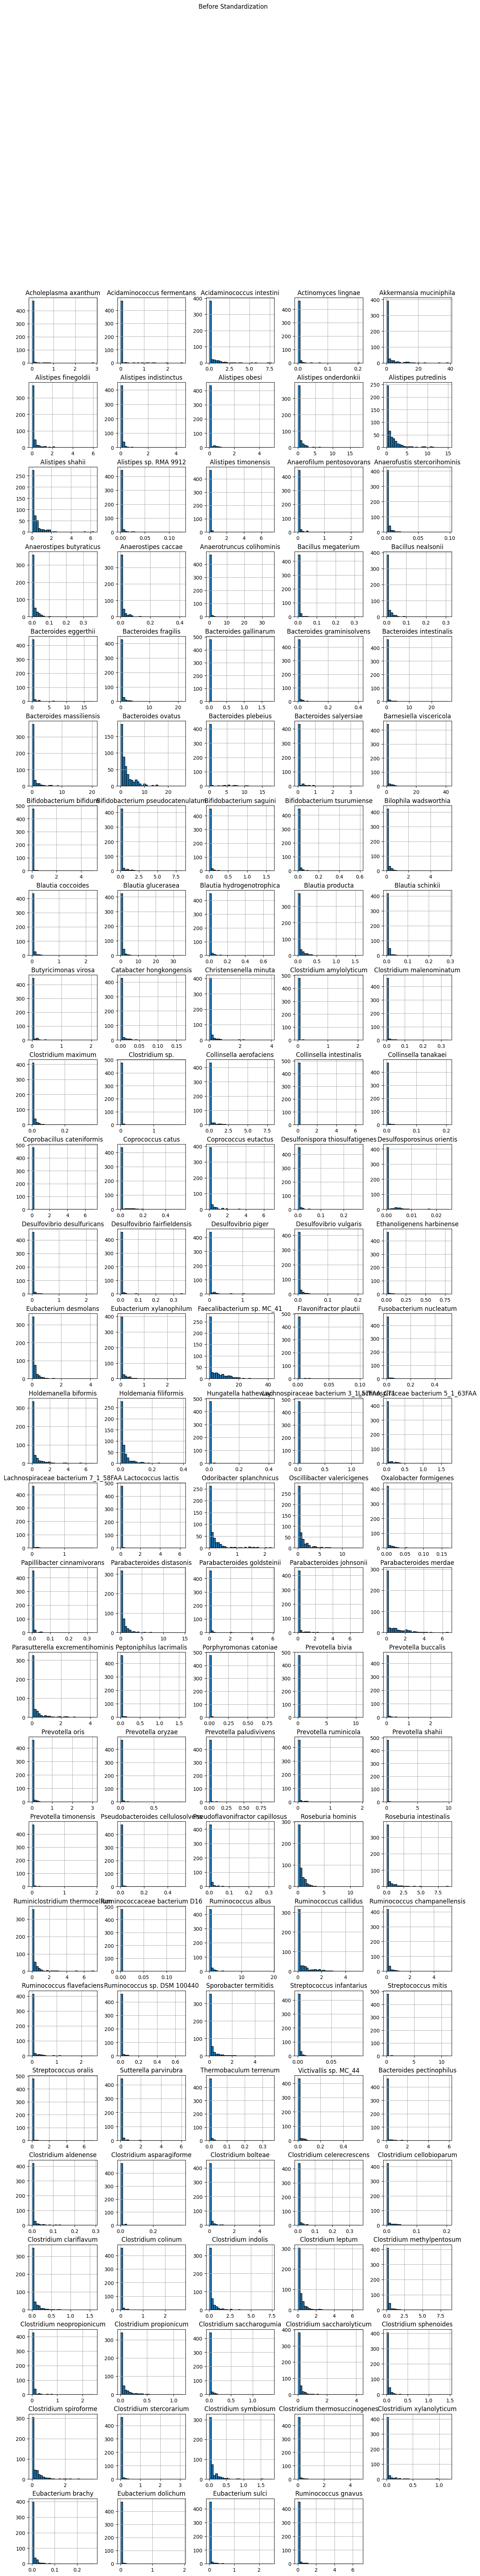

<Figure size 1500x8100 with 0 Axes>

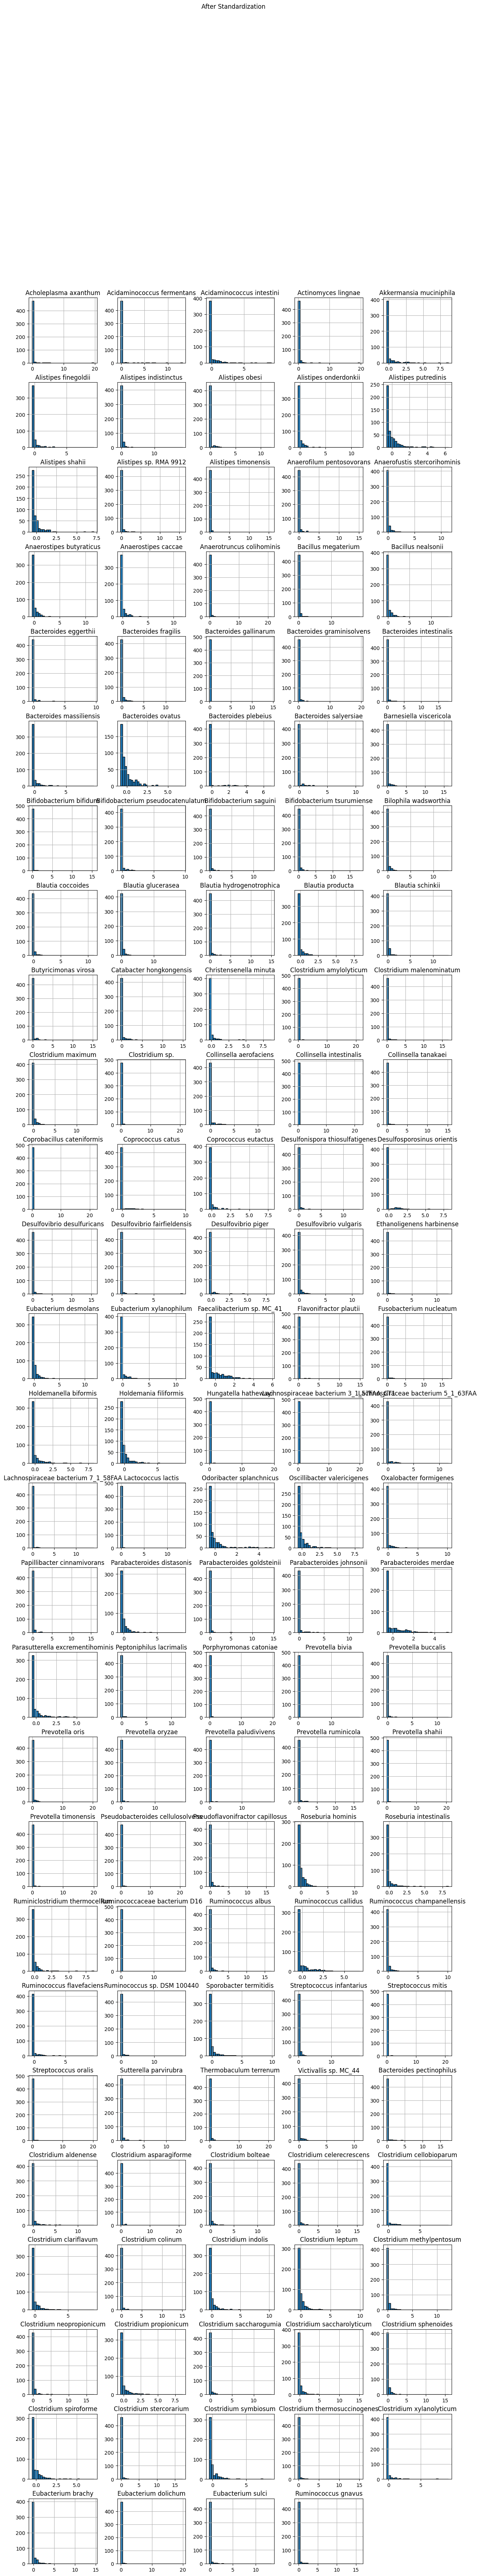

In [6]:
cols_species = dev_set.columns[7:]  

# Determine grid layout (rows and columns)
num_cols = len(cols_species)
num_rows = math.ceil(num_cols / 5)  # Adjust columns per row if needed

# Plot histograms before standardization
plt.figure(figsize=(15, num_rows * 3))  
dev_set[cols_species].hist(bins=30, figsize=(15, num_rows * 3), layout=(num_rows, 5), edgecolor='black')
plt.suptitle("Before Standardization")
plt.show()

scaled_dev_set = dev_set.copy()
# Apply z-score standardization
scaler = StandardScaler()
scaled_dev_set[cols_species] = scaler.fit_transform(dev_set[cols_species])

# Plot histograms after standardization
plt.figure(figsize=(15, num_rows * 3))  
scaled_dev_set[cols_species].hist(bins=30, figsize=(15, num_rows * 3), layout=(num_rows, 5), edgecolor='black')
plt.suptitle("After Standardization")
plt.show()


In [42]:
# Save standardized dataset
scaled_dev_set.to_csv("../data/development_final_data.csv", index=False)

In [7]:
cols_species_val = val_set.columns[7:]  

# Determine grid layout (rows and columns)
num_cols = len(cols_species_val)

scaled_val_set = val_set.copy()
# Apply z-score standardization
scaler = StandardScaler()
scaler.fit(dev_set[cols_species])
scaled_val_set[cols_species] = scaler.transform(val_set[cols_species])
# Save standardized dataset
scaled_val_set.to_csv("../data/evaluation_final_data.csv", index=False)

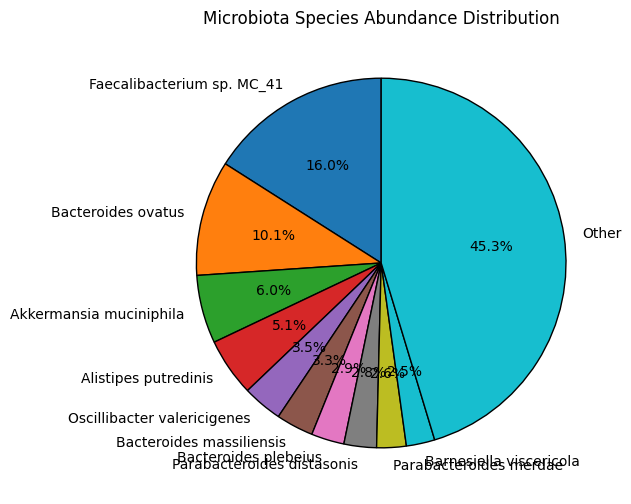

In [8]:
cols_species = dev_set.columns[7:]  
# Sum abundances for each species
species_sums = dev_set[cols_species].sum().sort_values(ascending=False)


# Select top 10 species and group the rest as "Other"
top_10_species = species_sums[:10]
other_species_sum = species_sums[10:].sum()

# Append "Other" category
top_10_species["Other"] = other_species_sum

# Plot pie chart
plt.figure(figsize=(10, 6))
top_10_species.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    cmap='tab10', 
    wedgeprops={'edgecolor': 'black'}
)
plt.ylabel("")
plt.title("Microbiota Species Abundance Distribution")
plt.show()


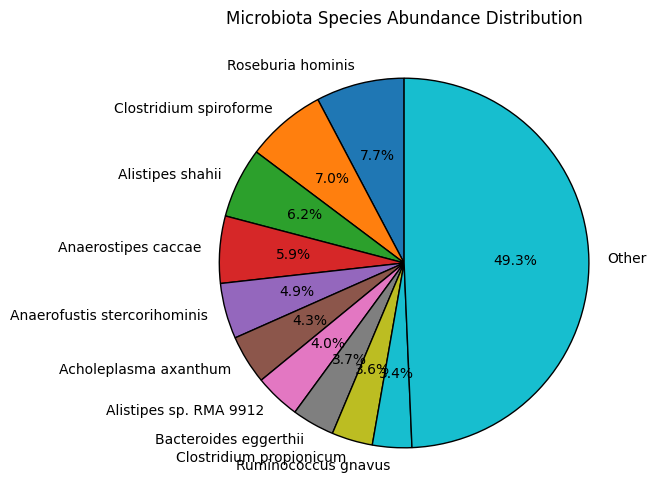

In [12]:
# Calculate species sums and ensure non-negative values
species_sums = scaled_dev_set[cols_species].sum().clip(lower=0).sort_values(ascending=False)

# Select top 10 species and group the rest as "Other"
top_10_species = species_sums[:10]
other_species_sum = species_sums[10:].sum()

# Append "Other" category (only if the sum is positive)
if other_species_sum > 0:
    top_10_species["Other"] = other_species_sum

# Plot pie chart (only if there are positive values to plot)
if not top_10_species.empty:
    plt.figure(figsize=(10, 6))
    top_10_species.plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        cmap='tab10', 
        wedgeprops={'edgecolor': 'black'}
    )
    plt.ylabel("")
    plt.title("Microbiota Species Abundance Distribution")
    plt.show()
else:
    print("No positive species abundances to plot.")

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset
# dev = pd.read_csv("your_dev_dataset.csv")  # replace with your file

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'Project ID', 'Experiment type', 'Sex', 'Host age', 'Disease MESH ID']
dev_cleaned = dev_set.drop(columns=columns_to_drop)

# Separate features and target
X_dev = dev_cleaned.drop(columns=['BMI'])  # assuming BMI is still there
y_dev = dev_cleaned['BMI']

In [17]:
dev_cleaned

,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,19.01,0.000000,0.000000,0.000000,0.000000,0.017674,0.000000,0.000000,0.00000,0.117827,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,23.50,0.001028,0.000000,0.000000,0.000000,13.015800,0.001542,0.000000,0.00000,0.073486,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,25.80,0.001406,0.000000,0.000000,0.001406,0.002812,0.201074,0.000000,0.00000,0.043590,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,23.49,0.000000,0.008825,0.273562,0.000000,0.044123,0.004412,0.348570,0.00000,0.026474,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,22.60,0.002878,0.037419,7.359970,0.000000,0.872143,0.000000,0.000000,0.00000,1.732770,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,24.97,0.000000,0.000000,0.000000,0.000000,0.509040,0.015800,0.018390,0.06278,0.059660,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002160,0.000000,0.000000
485,25.80,0.000000,0.000000,0.000000,0.000000,0.005112,0.015139,0.000000,0.00000,0.020054,...,0.000000,0.017105,0.001770,0.032834,0.000000,0.000590,0.000393,0.000000,0.000197,0.004522
486,29.53,0.000000,0.000000,0.000000,0.000000,0.052094,0.093770,0.000000,0.00000,0.211850,...,0.000000,0.309092,0.052094,0.197958,0.000000,0.006946,0.000000,0.017365,0.065986,0.000000
487,25.55,0.001556,0.001556,0.122888,0.000000,0.000000,0.001556,0.045111,0.00000,0.090222,...,0.017111,0.057555,0.000000,0.054444,0.000000,0.045111,0.010889,0.000000,0.009333,0.018667


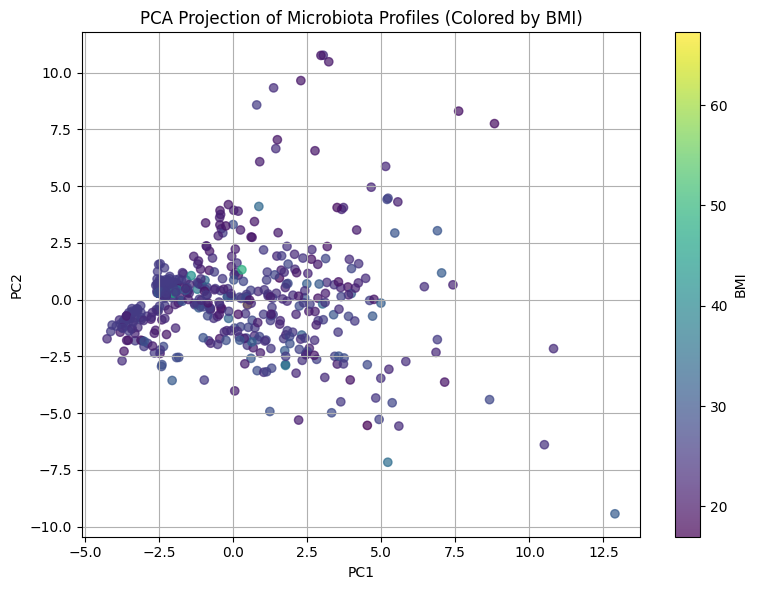

In [20]:


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dev)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA projection
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_dev, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='BMI')
plt.title("PCA Projection of Microbiota Profiles (Colored by BMI)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()


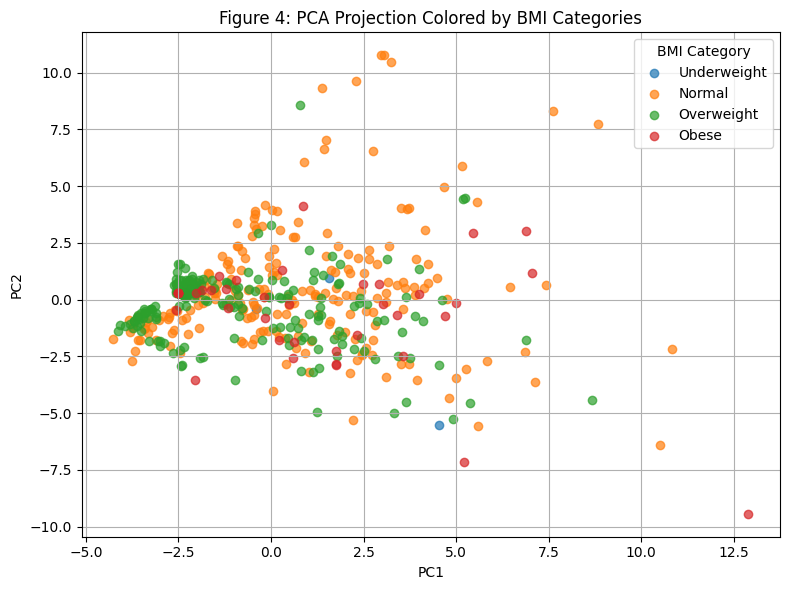

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply to the dataset
bmi_categories = y_dev.apply(categorize_bmi)

# PCA as before
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dev)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['BMI Category'] = bmi_categories

# Plot
plt.figure(figsize=(8,6))
for category in ['Underweight', 'Normal', 'Overweight', 'Obese']:
    subset = pca_df[pca_df['BMI Category'] == category]
    plt.scatter(subset['PC1'], subset['PC2'], label=category, alpha=0.7)

plt.title("Figure 4: PCA Projection Colored by BMI Categories")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="BMI Category")
plt.grid(True)
plt.tight_layout()
plt.show()
